### install natural language toolkit 

In [6]:
! pip install -U nltk

Requirement already up-to-date: six in /Users/yoshikinakajima/anaconda/lib/python3.6/site-packages (from nltk)


In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yoshikinakajima/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### data

In [13]:
messages= [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [14]:
for num , message in enumerate(messages[:10]):
    print(num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

Due to the spacing we can tell that this is a TSV ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the enumerate call).

Using these labeled ham and spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam.

In [26]:
import pandas  
messages=pandas.read_csv("smsspamcollection/SMSSpamCollection", sep='\t', 
                                                 names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [29]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [31]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

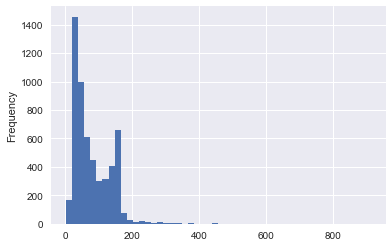

In [35]:
messages['length'].plot(bins=50,kind='hist')

In [36]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [37]:
messages[messages['length']==910]['message'].iloc[0]  # check the longest message 

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ea865c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ecffcc0>], dtype=object)

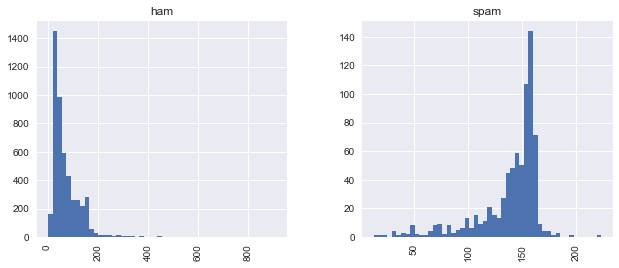

In [42]:
messages.hist(column='length', by='label', bins=50,figsize=(10,4))

### Preprocessing 
convert string into numerical

In [43]:
import string 
mess = 'Sample message! Notice: it has punctuation'

In [44]:
type(mess)

str

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
nopunc= [char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [51]:
from nltk.corpus import stopwords

In [52]:
stopwords.words('english')[0:10] # 10 most common words that dont give us much info -> stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [53]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [55]:
clean_mess= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # lower to make word lowercase
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

This is the preprocessing of text data. Lets make a function to:
1. remove punctuations 
2. remove stopwoeds
3. return a list of cleaned text

In [56]:
def text_process(mess):
    nopunc= [char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_mess= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [57]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
messages['message'].head(5).apply(text_process)  # not inplace this now . just as an example

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorisation
Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

We'll do that in three steps using the bag-of-words model:  
1. Count how many times does a word occur in each message (Known as term frequency)  
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)  
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
bow_transformer =CountVectorizer(analyzer=text_process)   # bow: bag of words
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x11e49e598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [62]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [64]:
bow4 = bow_transformer.transform([message4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [66]:
print(bow_transformer.get_feature_names()[9554])

say


In [67]:
messages_bow=bow_transformer.transform(messages['message'])

In [79]:
print('shape of sparse matrix:', messages_bow.shape)
print('amount of nonzero occurances:', messages_bow.nnz)
print('sparsity: %.2f%%' %(100*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1])))

shape of sparse matrix: (5572, 11425)
amount of nonzero occurances: 50548
sparsity: 0.08%


#### TF-IDF

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer= TfidfTransformer().fit(messages_bow)

In [87]:
tfidf4=tfidf_transformer.transform(bow4)

In [88]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [89]:
# idf value of the word 'university'
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.5270764989


In [92]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
messages_tfidf.shape

(5572, 11425)

### Train a model
Naive Bayes is a good choise to classify ham/spam.  see more at http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
spam_detect_model= MultinomialNB().fit(messages_tfidf, messages['label'])

In [97]:
print('predicted: ' , spam_detect_model.predict(tfidf4)[0])
print('expected: ', messages['label'][3])

predicted:  ham
expected:  ham


In [98]:
all_predictions=spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


### Evaluate a model
[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)  
[f1score](https://en.wikipedia.org/wiki/F1_score)

In [100]:
from sklearn.metrics import classification_report 
print(classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [102]:
import sklearn
sklearn.metrics.confusion_matrix(messages['label'], all_predictions)

array([[4825,    0],
       [ 115,  632]])

Importante note, the above model doesnt split training set and test set.  
So lets do it again using training and test

### Create a Data Pipeline

In [104]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = \    # \ to go to the next line w/o ending the code
train_test_split(messages['message'],messages['label'], test_size=0.2)

[Pipeline](http://scikit-learn.org/stable/modules/pipeline.html) can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification.

In [106]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                                  ('tfidf', TfidfTransformer()),
                                  ('classifier', MultinomialNB())])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [107]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11e49e598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [111]:
predictions=pipeline.predict(msg_test)

In [112]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98      1003
       spam       0.77      1.00      0.87       112

avg / total       0.98      0.97      0.97      1115



In [119]:
sklearn.metrics.confusion_matrix(predictions,label_test)

array([[969,  34],
       [  0, 112]])

### More resources
[NLTK Book Online](http://www.nltk.org/book/)  
[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)  
[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)